# Séance 3

Ce travail consiste à explorer les données des arbres de la ville de Paris, dans sa dimension attributaire et spatiale.

## Configuration de l'environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install geopandas
# Instal contextily (fonds de carte)
!pip install contextily
# Install mapclassify (cartographie thématique)
!pip install mapclassify
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Install scalebar
!pip install matplotlib_scalebar

In [ ]:

#Importation des librairies nécessaires
from shapely.geometry import LineString, Point, Polygon
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import seaborn # Visualisation de données avancée
import geopandas as gpd #Gestion données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import folium #Cartographie interactive
import mapclassify #Cartographie thématique
from matplotlib_scalebar.scalebar import ScaleBar #Echelle cartographique

# Importation et préparation des données de la séance

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O velibs.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr
!wget -O pistescyclables.geojson https://opendata.paris.fr/explore/dataset/reseau-cyclable/download/?format=geojson&timezone=Europe/Berlin&lang=fr


## Couche des IRIS

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 11e Arrondissement   75   
4  Paris 11e Arrondissement   75   

                                            geometry  
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  
3  POLYGON ((654660.400 6862417.100, 654717.000 6...  
4  POLYGON ((654009.750 6863582.110, 654007.750 6...

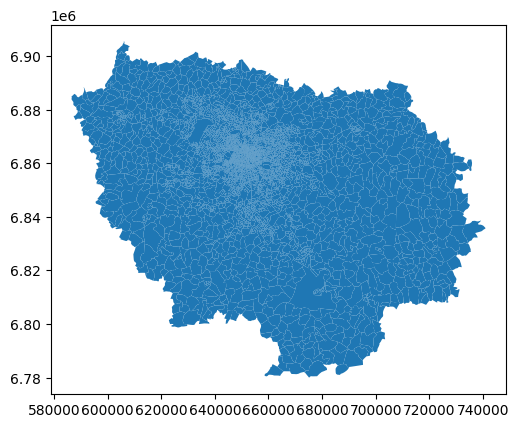

In [ ]:
#Importer et reprojeter la couche des IRIS

IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS = IRIS.to_crs(2154)
IRIS.plot()
IRIS.head()

<Axes: >

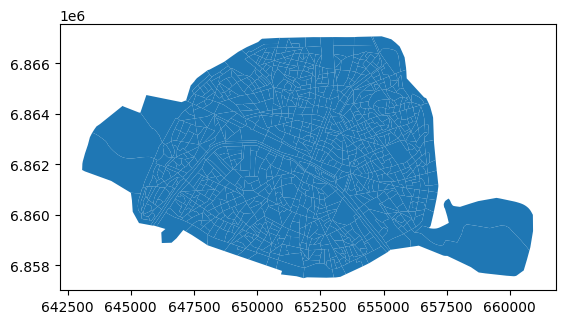

In [ ]:
#Garder que les IRIS de Paris

IRIS = IRIS[(IRIS["dep"] == 75)]
IRIS.plot()

<Axes: >

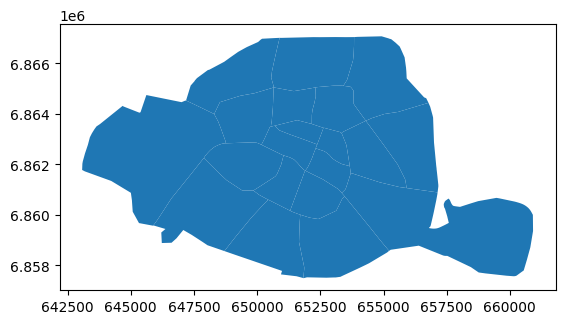

In [ ]:
# Créer une couche des arrondissements

ARDT = IRIS.dissolve(by='nom_com')
ARDT.plot()

name stationcode  ebike  mechanical  \
0  Benjamin Godard - Victor Hugo       16107      8           5   
1      Mairie de Rosny-sous-Bois       31104     21           0   
2       Jourdan - Stade Charléty       14014      3           2   

                    duedate  numbikesavailable  numdocksavailable  capacity  \
0 2024-03-20 12:38:07+00:00                 13                 22        35   
1 2024-03-20 12:42:12+00:00                 21                  7        30   
2 2024-03-20 12:42:10+00:00                  5                 52        60   

  is_renting is_installed nom_arrondissement_communes is_returning  \
0        OUI          OUI                       Paris          OUI   
1        OUI          OUI             Rosny-sous-Bois          OUI   
2        OUI          OUI                       Paris          OUI   

                         geometry  
0  POINT (646867.548 6863127.314)  
1  POINT (662339.371 6863592.468)  
2  POINT (651784.242 6857907.540)

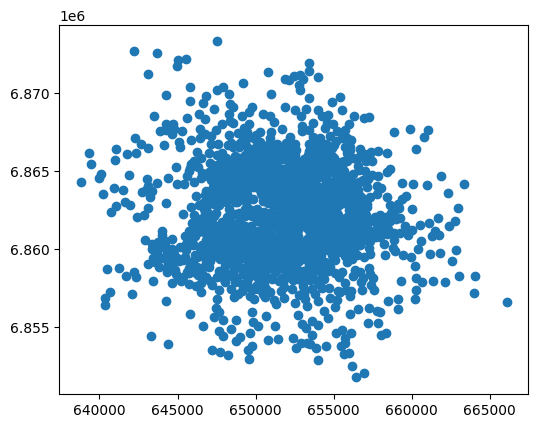

In [ ]:
#Importer et reprojeter la couche des velibs

Velibs= gpd.read_file("velibs.geojson", encoding='utf-8')
Velibs = Velibs.to_crs(2154)
Velibs.plot()
Velibs.head(3)

990

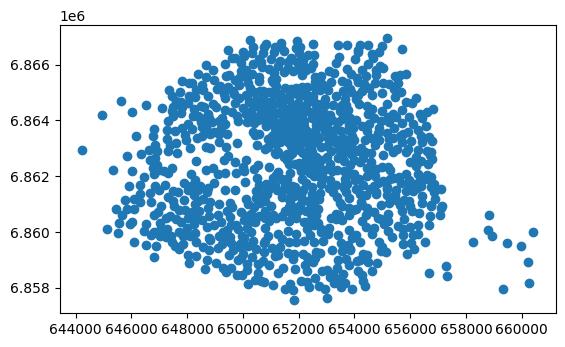

In [ ]:
#Ne garder que les stations de Velibs de la ville de Paris (sélection par localisation)

VelibParis = Velibs[(Velibs["nom_arrondissement_communes"] == 'Paris')]
VelibParis.plot()
VelibParis['name'].size

In [ ]:
#Créer une colonne latitude et longitude
VelibParis['latitude'] = VelibParis.geometry.y
VelibParis['longitude'] = VelibParis.geometry.x
VelibParis.head(3)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


name stationcode  ebike  mechanical  \
0  Benjamin Godard - Victor Hugo       16107      8           5   
2       Jourdan - Stade Charléty       14014      3           2   
5             Toudouze - Clauzel        9020      2           0   

                    duedate  numbikesavailable  numdocksavailable  capacity  \
0 2024-03-20 12:38:07+00:00                 13                 22        35   
2 2024-03-20 12:42:10+00:00                  5                 52        60   
5 2024-03-20 12:40:54+00:00                  2                 19        21   

  is_renting is_installed nom_arrondissement_communes is_returning  \
0        OUI          OUI                       Paris          OUI   
2        OUI          OUI                       Paris          OUI   
5        OUI          OUI                       Paris          OUI   

                         geometry      latitude      longitude  
0  POINT (646867.548 6863127.314)  6.863127e+06  646867.547600  
2  POINT (651784.242 6857907.540)  6.857908e+06  651784.241945  
5  POINT (651401.378 6864567.904)  6.864568e+06  651401.378236

In [ ]:
# Ne garder que les champs intéressants et les renommer

VelibParis = VelibParis[["name", "stationcode", "ebike", "mechanical", "numbikesavailable", "numdocksavailable", "capacity", "latitude", "longitude", "geometry"]]
VelibParis = VelibParis.rename(columns={'name': 'Nom', 'stationcode':'Code', 'ebike': 'Veloselectriques', 'ebike': 'Veloselectriques', 'mechanical': 'Velosmecaniques', 'numbikesavailable': 'Velosdispo', 'numdocksavailable': 'Soclesdispo', 'capacity': 'Capacite'})
VelibParis.head()

Nom   Code  Veloselectriques  \
0        Benjamin Godard - Victor Hugo  16107                 8   
2             Jourdan - Stade Charléty  14014                 3   
5                   Toudouze - Clauzel   9020                 2   
6  Charonne - Robert et Sonia Delaunay  11104                 1   
7                      Mairie du 12ème  12109                 3   

   Velosmecaniques  Velosdispo  Soclesdispo  Capacite      latitude  \
0                5          13           22        35  6.863127e+06   
2                2           5           52        60  6.857908e+06   
5                0           2           19        21  6.864568e+06   
6                1           2           18        20  6.861935e+06   
7                1           4           26        30  6.860264e+06   

       longitude                        geometry  
0  646867.547600  POINT (646867.548 6863127.314)  
2  651784.241945  POINT (651784.242 6857907.540)  
5  651401.378236  POINT (651401.378 6864567.904)  
6  655430.484286  POINT (655430.484 6861934.722)  
7  655049.485913  POINT (655049.486 6860263.893)

length date_de_livraison bois couloir_bus typologie_simple statut  \
0  139.975308              None   01        None               04     01   
1   74.251046        2013-10-15   01        None               05     03   
2   67.744362        2013-10-24   01        None               05     03   

  sens_velo bidirectionnel  longueur_du_troncon_en_km                    voie  \
0        01             01                   0.139975            AVENUE IBSEN   
1        02             02                   0.074251  RUE DU MOULIN DES PRES   
2        02             02                   0.067744        RUE DES REGLISES   

   arrdt piste type_continuite reseau position circulation  \
0   20.0     1            None   None     None        None   
1   13.0  None            None   None     None        None   
2   20.0  None            None   None     None        None   

                                            geometry  
0  LINESTRING (657010.453 6863227.770, 657003.994...  
1  LINESTRING (652516.920 6858730.052, 652502.840...  
2  LINESTRING (656718.340 6861799.168, 656676.050...

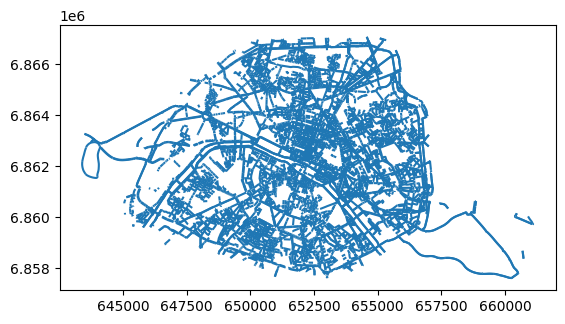

In [ ]:
#Importer la couche des pistes cyclables

pistescyclables= gpd.read_file("pistescyclables.geojson", encoding='utf-8')
pistescyclables = pistescyclables.to_crs(2154)
pistescyclables.plot()
pistescyclables.head(3)

# Opérateur métriques : Calcul de surface, de longueur...

In [ ]:

#Calculer la surface des IRIS (en km2)

IRIS["surface"] = IRIS['geometry'].area/1000000
IRIS.head(5)

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 11e Arrondissement   75   
4  Paris 11e Arrondissement   75   

                                            geometry   surface  
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  0.122526  
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  0.123771  
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  0.079612  
3  POLYGON ((654660.400 6862417.100, 654717.000 6...  0.050855  
4  POLYGON ((654009.750 6863582.110, 654007.750 6...  0.035169

In [ ]:
#Calculer la longueur (en metre) des tronçons des pistes cyclables

pistescyclables["longueur"] = pistescyclables['geometry'].length
pistescyclables['longueur'] = round(pistescyclables['longueur'],0)
pistescyclables.head(3)


length date_de_livraison bois couloir_bus typologie_simple statut  \
0  139.975308              None   01        None               04     01   
1   74.251046        2013-10-15   01        None               05     03   
2   67.744362        2013-10-24   01        None               05     03   

  sens_velo bidirectionnel  longueur_du_troncon_en_km                    voie  \
0        01             01                   0.139975            AVENUE IBSEN   
1        02             02                   0.074251  RUE DU MOULIN DES PRES   
2        02             02                   0.067744        RUE DES REGLISES   

   arrdt piste type_continuite reseau position circulation  \
0   20.0     1            None   None     None        None   
1   13.0  None            None   None     None        None   
2   20.0  None            None   None     None        None   

                                            geometry  longueur  
0  LINESTRING (657010.453 6863227.770, 657003.994...     140.0  
1  LINESTRING (652516.920 6858730.052, 652502.840...      74.0  
2  LINESTRING (656718.340 6861799.168, 656676.050...      68.0

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep                        geometry   surface  
0   Paris 5e Arrondissement   75  POINT (652014.243 6860487.692)  0.122526  
1   Paris 7e Arrondissement   75  POINT (648386.749 6861844.476)  0.123771  
2   Paris 8e Arrondissement   75  POINT (649825.004 6863921.860)  0.079612  
3  Paris 11e Arrondissement   75  POINT (654612.063 6862260.944)  0.050855  
4  Paris 11e Arrondissement   75  POINT (654014.821 6863422.485)  0.035169

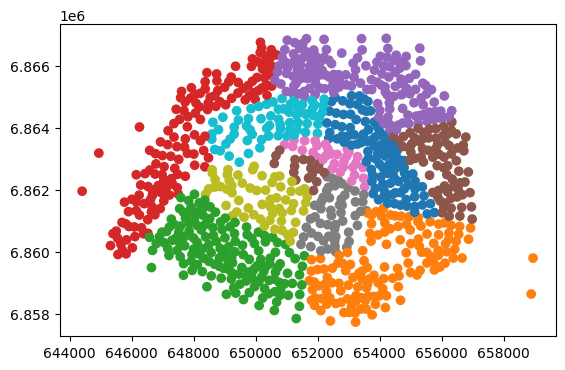

In [ ]:
# Créer une couche de centroides des IRIS

IRIScentro = IRIS.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid
IRIScentro.plot(column = "nom_com")
IRIScentro.head()

In [ ]:
# Créer une paire de coordonées géographique en WGS84 pour les centroides des IRIS (qui est en 2154)

IRIScentro["Longitude"] = IRIScentro['geometry'].to_crs(4326).x
IRIScentro["Latitude"] = IRIScentro['geometry'].to_crs(4326).y
IRIScentro.head()

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep                        geometry   surface  \
0   Paris 5e Arrondissement   75  POINT (652014.243 6860487.692)  0.122526   
1   Paris 7e Arrondissement   75  POINT (648386.749 6861844.476)  0.123771   
2   Paris 8e Arrondissement   75  POINT (649825.004 6863921.860)  0.079612   
3  Paris 11e Arrondissement   75  POINT (654612.063 6862260.944)  0.050855   
4  Paris 11e Arrondissement   75  POINT (654014.821 6863422.485)  0.035169   

   Longitude   Latitude  
0   2.346177  48.842649  
1   2.296589  48.854570  
2   2.315944  48.873365  
3   2.381382  48.858784  
4   2.373117  48.869187

# Jointure spatiale et agrégation statistique

## Préparation des données

In [ ]:
# Ajouter une colonne avec le tx d'occupation et le tx de disponibilité de chaque stations dans la table des stations

VelibParis["Txdispo"] = VelibParis["Soclesdispo"] / VelibParis["Capacite"] *100
VelibParis["Txoccupation"] = 100 - VelibParis["Txdispo"]
VelibParis.head()

Nom   Code  Veloselectriques  \
0        Benjamin Godard - Victor Hugo  16107                 8   
2             Jourdan - Stade Charléty  14014                 3   
5                   Toudouze - Clauzel   9020                 2   
6  Charonne - Robert et Sonia Delaunay  11104                 1   
7                      Mairie du 12ème  12109                 3   

   Velosmecaniques  Velosdispo  Soclesdispo  Capacite      latitude  \
0                5          13           22        35  6.863127e+06   
2                2           5           52        60  6.857908e+06   
5                0           2           19        21  6.864568e+06   
6                1           2           18        20  6.861935e+06   
7                1           4           26        30  6.860264e+06   

       longitude                        geometry    Txdispo  Txoccupation  
0  646867.547600  POINT (646867.548 6863127.314)  62.857143     37.142857  
2  651784.241945  POINT (651784.242 6857907.540)  86.666667     13.333333  
5  651401.378236  POINT (651401.378 6864567.904)  90.476190      9.523810  
6  655430.484286  POINT (655430.484 6861934.722)  90.000000     10.000000  
7  655049.485913  POINT (655049.486 6860263.893)  86.666667     13.333333

<Axes: xlabel='Capacite', ylabel='Velosdispo'>

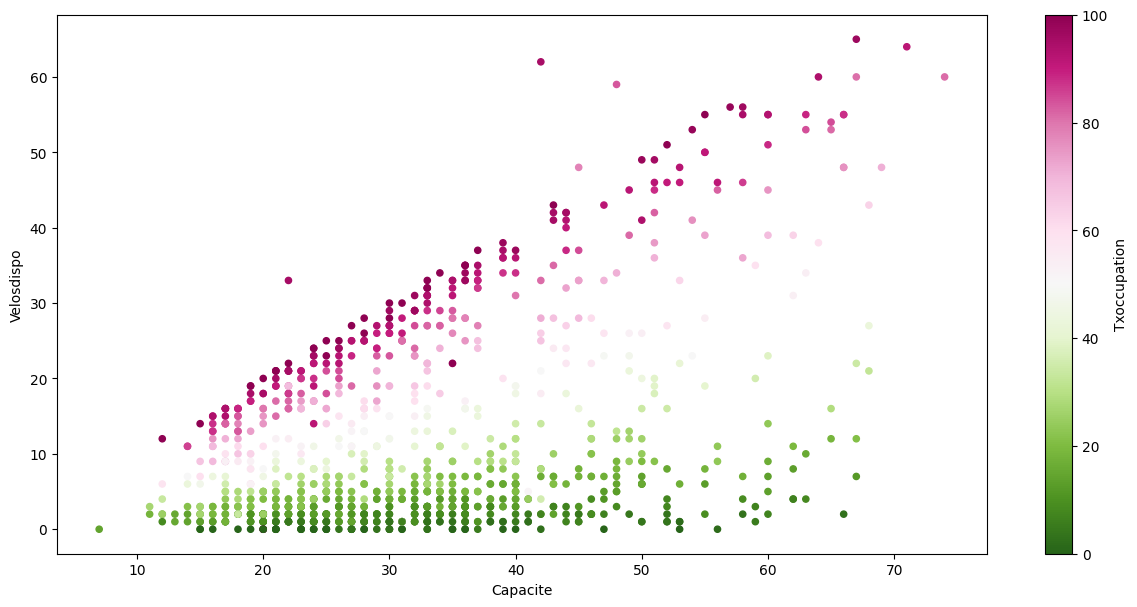

In [ ]:
# Explorer les données avec un nuage de points

VelibParis.plot(figsize =(15,7), kind="scatter", x="Capacite", y= "Velosdispo", c= "Txoccupation", cmap='PiYG_r')

In [ ]:
# Jointure spatiale Velibs <> IRIS

Velibok = gpd.sjoin(VelibParis, IRIS[["code_iris", "geometry"]])
Velibok.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
0    Benjamin Godard - Victor Hugo  16107                 8                5   
361        Flandrin - Henri Martin  16018                 1                1   
2         Jourdan - Stade Charléty  14014                 3                2   
190  David Weill - Parc Montsouris  14124                 1                0   
956   Jourdan - Cité Universitaire  14135                 2                1   

     Velosdispo  Soclesdispo  Capacite      latitude      longitude  \
0            13           22        35  6.863127e+06  646867.547600   
361           2           16        18  6.862945e+06  646623.214381   
2             5           52        60  6.857908e+06  651784.241945   
190           1           21        22  6.858098e+06  651080.226398   
956           3           33        39  6.857962e+06  651517.814409   

                           geometry    Txdispo  Txoccupation  index_right  \
0    POINT (646867.548 6863127.314)  62.857143     37.142857         3327   
361  POINT (646623.214 6862945.467)  88.888889     11.111111         3327   
2    POINT (651784.242 6857907.540)  86.666667     13.333333         3728   
190  POINT (651080.226 6858098.471)  95.454545      4.545455         3728   
956  POINT (651517.814 6857961.913)  84.615385     15.384615         3728   

     code_iris  
0    751166304  
361  751166304  
2    751145401  
190  751145401  
956  751145401

## Agrégation à l'échelle des arrondissements

In [ ]:

# Compter le nombre de stations de vélibs par IRIS dans un dataframe

NbvelibIRIS  = Velibok[["code_iris", "Code"]].groupby("code_iris").size()
NbvelibIRIS =pd.DataFrame(NbvelibIRIS)
NbvelibIRIS = NbvelibIRIS.rename(columns={0: 'Nbstations'})
NbvelibIRIS.head(5)


Nbstations
code_iris            
751010101           1
751010102           1
751010103           1
751010201           3
751010202           3

<Axes: ylabel='Frequency'>

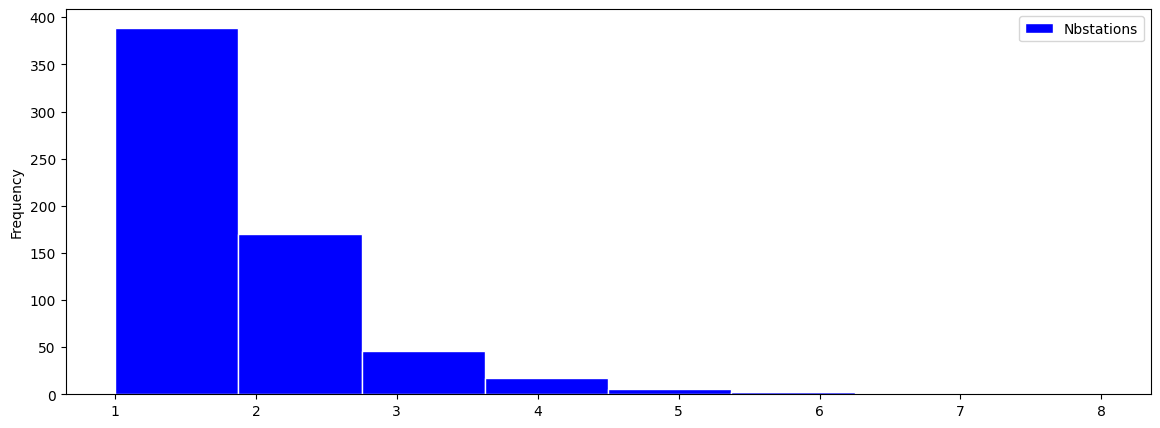

In [ ]:
# Faire un histogramme de cette nouvelle variable

NbvelibIRIS.plot(figsize =(14,5), kind="hist", bins = 8, color = "blue", edgecolor = 'white')

In [ ]:
# Calculer la capacité des stations de vélibs par IRIS

NbvelibIRIS  = Velibok[["code_iris", "Capacite"]].groupby("code_iris").sum()
NbvelibIRIS =pd.DataFrame(NbvelibIRIS)
NbvelibIRIS.head(5)


Capacite
code_iris          
751010101        22
751010102        17
751010103        28
751010201       100
751010202        72

<Axes: ylabel='Frequency'>

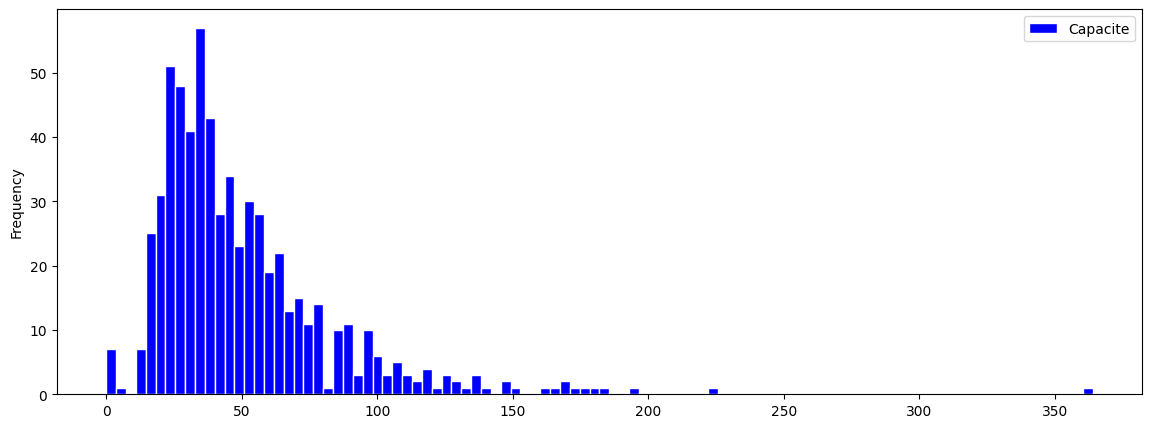

In [ ]:
# Faire un histogramme de cette nouvelle variable

NbvelibIRIS.plot(figsize =(14,5), kind="hist", bins = 100, color = "blue", edgecolor = 'white')

In [ ]:
#Sortir des statistiques descriptives

A = NbvelibIRIS['Capacite'].min()
B = NbvelibIRIS['Capacite'].max()
C = NbvelibIRIS['Capacite'].sum()
D = NbvelibIRIS['Capacite'].mean()

print ("Capacité minimale = " + str(A) + "\nCapacité maximale = " + str(B) + "\nCapacité totale = " + str(C) + "\nCapacité moyenne = " + str(D) )


Capacité minimale = 0
Capacité maximale = 364
Capacité totale = 31654
Capacité moyenne = 50.164817749603806


In [ ]:
# Calculer le nombre de vélos disponibles par IRIS

NbvelibdispoIRIS  = Velibok[["code_iris", "Velosdispo"]].groupby("code_iris").sum()
NbvelibdispoIRIS =pd.DataFrame(NbvelibdispoIRIS)
NbvelibdispoIRIS.head(5)

Velosdispo
code_iris            
751010101          18
751010102          14
751010103          25
751010201          59
751010202          63

<Axes: ylabel='Frequency'>

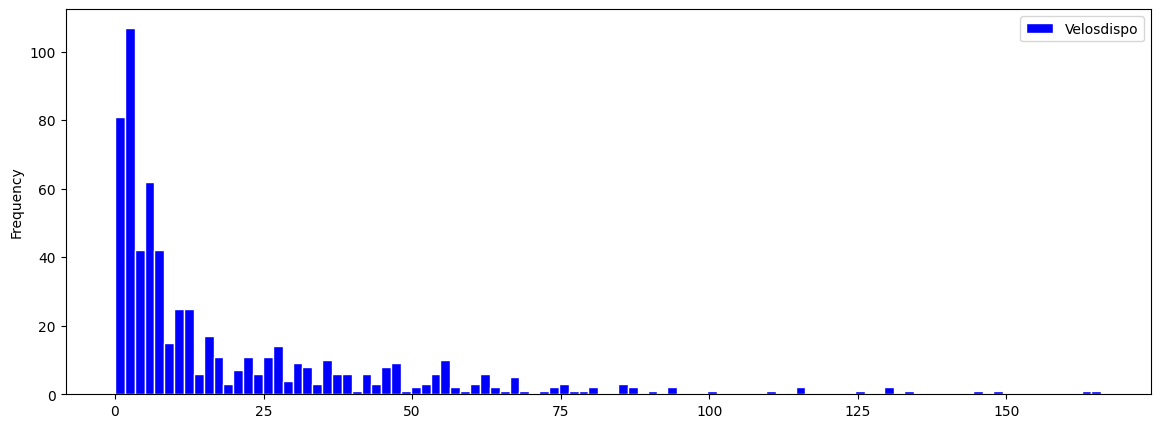

In [ ]:

# Faire un histogramme de cette nouvelle variable

NbvelibdispoIRIS.plot(figsize =(14,5), kind="hist", bins = 100, color = "blue", edgecolor = 'white')

In [ ]:

# Calculer le taux moyen d'occupation par IRIS

TxoccvelibIRIS  = Velibok[["code_iris", "Txoccupation"]].groupby("code_iris").mean()
TxoccvelibIRIS =pd.DataFrame(TxoccvelibIRIS)
TxoccvelibIRIS.head(5)

# Calculer le taux moyen de disponibilité par IRIS

TxdispovelibIRIS  = Velibok[["code_iris", "Txdispo"]].groupby("code_iris").mean()
TxdispovelibIRIS =pd.DataFrame(TxdispovelibIRIS)
TxdispovelibIRIS.head(5)

Txdispo
code_iris           
751010101   4.545455
751010102  17.647059
751010103   7.142857
751010201  46.626145
751010202  11.728395

In [ ]:
# Faire la jointure attributaire avec la couche des IRIS

IRISOK = IRIS.merge(NbvelibdispoIRIS, left_on='code_iris', right_on='code_iris')
IRISFOK2 = IRISOK.merge(TxoccvelibIRIS, left_on='code_iris', right_on='code_iris')


IRISFOK3 = IRISFOK2.merge(NbvelibdispoIRIS, left_on='code_iris', right_on='code_iris')
IRISFINAL3 = IRISFOK2.merge(NbvelibdispoIRIS, left_on='code_iris', right_on='code_iris')
IRISFINAL3.head()

nom_iris  insee_com  iris typ_iris  code_iris  \
0    Val de Grace 7      75105  1907        H  751051907   
1    Gros Caillou 7      75107  2807        H  751072807   
2       Madeleine 3      75108  3103        A  751083103   
3  Maison Blanche 3      75113  5103        H  751135103   
4        Vivienne 1      75102   601        H  751020601   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 13e Arrondissement   75   
4   Paris 2e Arrondissement   75   

                                            geometry   surface  Velosdispo_x  \
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  0.122526            17   
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  0.123771            35   
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  0.079612            54   
3  POLYGON ((653157.000 6857882.000, 653092.000 6...  0.058901             3   
4  POLYGON ((651298.400 6863179.800, 651280.900 6...  0.123474           125   

   Txoccupation  Velosdispo_y  
0     75.000000            17  
1     66.205534            35  
2     94.594595            54  
3     11.538462             3  
4     95.167343           125

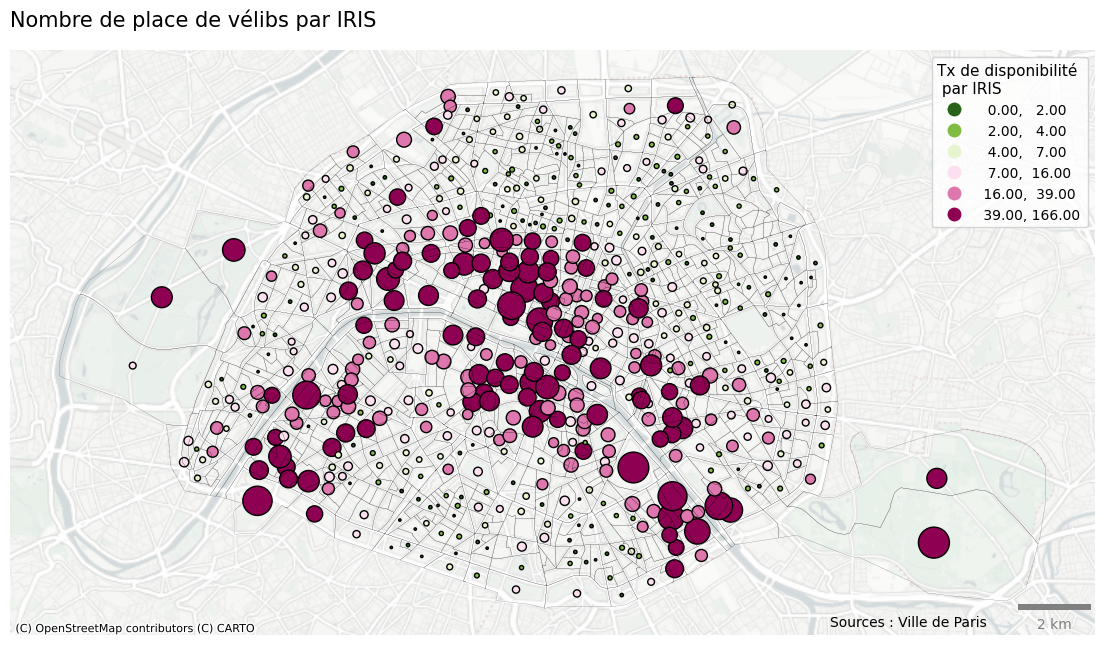

In [ ]:
#Cartographier la capacité (totale) et le taux de disponibilité (moyen) des stations de vélibs par IRIS

IRISFINAL3.geometry = IRISFINAL3['geometry'].centroid
sizes = IRISFINAL3['Velosdispo_x'] * 3  # Ajustez le facteur multiplicatif selon vos besoins

Carte1, ax = plt.subplots(figsize=(14,14))

IRIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
IRISFINAL3.to_crs('EPSG:3857').plot(ax=ax, markersize=sizes, edgecolor='black', column="Velosdispo_x",  k=6,  scheme='quantiles', alpha=1, cmap='PiYG_r', categorical=False,
                               legend=True, legend_kwds={'title': "Tx de disponibilité \n par IRIS", 'loc': 'upper right', 'title_fontsize':11, 'fontsize':10})
ctx.add_basemap(ax,source=ctx.providers.CartoDB.PositronNoLabels)

ax.axis("off")
plt.title('Nombre de place de vélibs par IRIS', loc='left', fontsize=15)
ax.text(0.90, 0.01, 'Sources : Ville de Paris', verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.show()

# Exercice autour des pistes cyclables

In [ ]:
# Jointure spatiale Pistes cyclables <> IRIS

pistescyclablesok = gpd.sjoin(pistescyclables, IRIS)
pistescyclablesok.head(3)

length date_de_livraison bois couloir_bus typologie_simple statut  \
0    139.975308              None   01        None               04     01   
378   55.531090              None   01           1               02     01   
443   36.300347              None   01        None               04     01   

    sens_velo bidirectionnel  longueur_du_troncon_en_km  \
0          01             01                   0.139975   
378        01             02                   0.055531   
443      None             01                   0.036300   

                               voie  ...  longueur index_right  \
0                      AVENUE IBSEN  ...     140.0         225   
378      PLACE DU MAQUIS DE VERCORS  ...      56.0         225   
443  AVENUE DE LA PORTE DE BAGNOLET  ...      36.0         225   

            nom_iris insee_com  iris typ_iris  code_iris  \
0    Saint-Fargeau 1     75120  7801        H  751207801   
378  Saint-Fargeau 1     75120  7801        H  751207801   
443  Saint-Fargeau 1     75120  7801        H  751207801   

                      nom_com  dep   surface  
0    Paris 20e Arrondissement   75  0.451263  
378  Paris 20e Arrondissement   75  0.451263  
443  Paris 20e Arrondissement   75  0.451263  

[3 rows x 27 columns]

In [ ]:
#Calculer la longueur des pistes cyclables par IRIS et en faire une carte

Longueurpistescyclables  = pistescyclablesok[["code_iris", "longueur"]].groupby("code_iris").sum()
Longueurpistescyclables =pd.DataFrame(Longueurpistescyclables)
Longueurpistescyclables.head(5)

longueur
code_iris          
751010101    4502.0
751010102    1130.0
751010103    2774.0
751010104   11593.0
751010105   13063.0

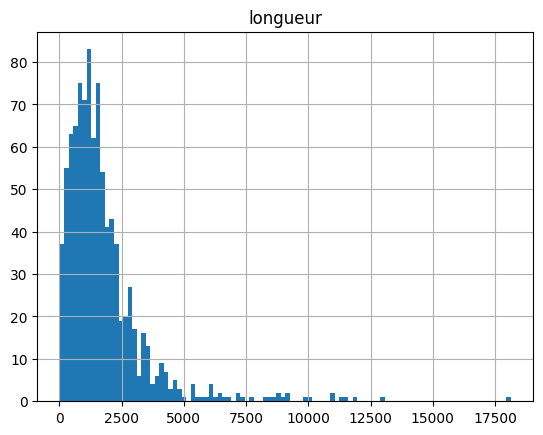

In [ ]:

hist = Longueurpistescyclables.hist(bins=100)

In [ ]:
# Faire la jointure attributaire

IRISfinal = IRIS.merge(Longueurpistescyclables, left_on='code_iris', right_on='code_iris')
IRISfinal.head()

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 11e Arrondissement   75   
4  Paris 11e Arrondissement   75   

                                            geometry   surface  longueur  
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  0.122526    2053.0  
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  0.123771    1675.0  
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  0.079612     238.0  
3  POLYGON ((654660.400 6862417.100, 654717.000 6...  0.050855    4023.0  
4  POLYGON ((654009.750 6863582.110, 654007.750 6...  0.035169    1588.0

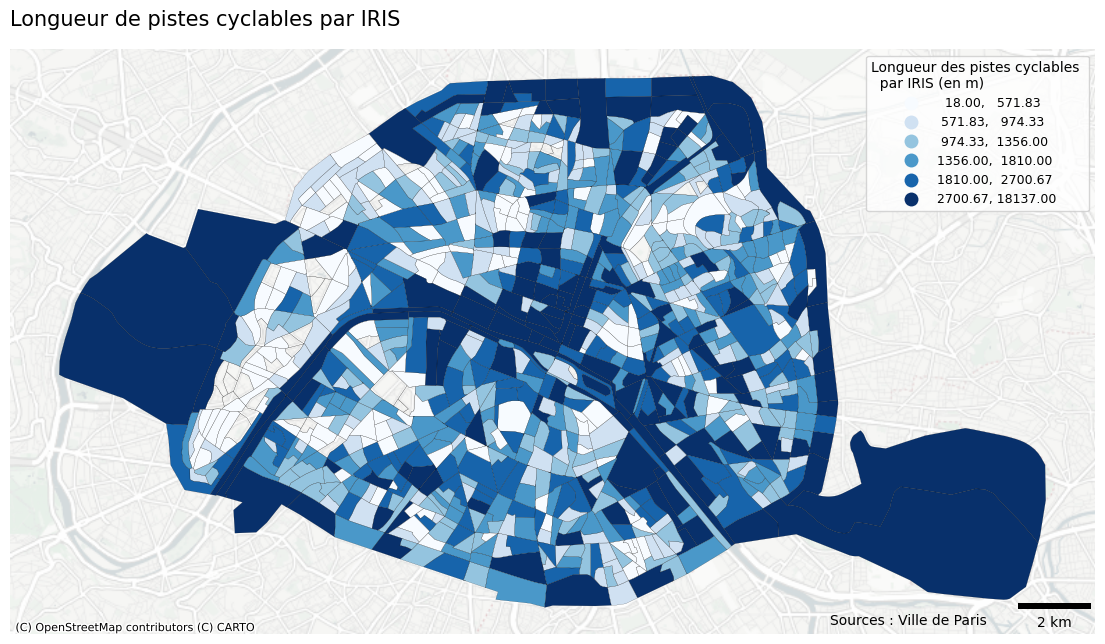

In [ ]:
#Cartographier la capacité des stations de vélibs par IRIS

Carte2, ax = plt.subplots(figsize=(14,14))

IRIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
IRISfinal.to_crs('EPSG:3857').plot(ax=ax, column="longueur", alpha=1, k=6, cmap='Blues',scheme='quantiles', categorical=False, legend=True,
                                   legend_kwds={'title': "Longueur des pistes cyclables \n  par IRIS (en m)", 'loc': 'upper right', 'title_fontsize':10, 'fontsize':9})

ctx.add_basemap(ax,  source=ctx.providers.CartoDB.PositronNoLabels)

ax.axis("off")
plt.title('Longueur de pistes cyclables par IRIS', loc='left', fontsize=15)
ax.text(0.90, 0.01, 'Sources : Ville de Paris', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="black"))

plt.show()

# EXERCICE AUTOUR DES ARBRES

In [ ]:
#Téléchargement des datas depuis le portail opendata (34mo)
!wget -O arbres.csv https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&

--2024-03-20 14:59:16--  https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘arbres.csv’

arbres.csv              [                <=> ]  34.63M   306KB/s    in 3m 32s  

2024-03-20 15:02:49 (167 KB/s) - ‘arbres.csv’ saved [36311457]



In [ ]:
#Importer CSV to dataframe

arbres = pd.read_csv("arbres.csv", sep=';')
arbres.head(3)

idbase typeemplacement domanialite     arrondissement complementadresse  \
0   295429           Arbre  Alignement     PARIS 5E ARRDT                80   
1  2001059           Arbre  Alignement   BOIS DE BOULOGNE               NaN   
2  2005287           Arbre  Alignement  BOIS DE VINCENNES               NaN   

   numero                  adresse idemplacement libellefrancais     genre  \
0     NaN  BOULEVARD SAINT GERMAIN     001602009         Platane  Platanus   
1     NaN    AVENUE ANATOLE FRANCE     000402072      Marronnier  Aesculus   
2     NaN             ALLEE ROYALE     000103072         Platane  Platanus   

        espece varieteoucultivar  circonferenceencm  hauteurenm  \
0  x hispanica               NaN                 90          17   
1     x carnea       ''Briotii''                 20           5   
2  x hispanica               NaN                100          16   

  stadedeveloppement remarquable                          geo_point_2d  
0             Adulte         NON     48.850740334399,2.346172628644636  
1                NaN         NON  48.851188618845946,2.234299174146054  
2             Adulte         NON  48.83413872911963,2.4336247211679787

In [ ]:
#Réorganiser la table

arbresok = arbres[["idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "geo_point_2d"]]
arbresok.head()

idbase domanialite     arrondissement libellefrancais  hauteurenm  \
0   295429  Alignement     PARIS 5E ARRDT         Platane          17   
1  2001059  Alignement   BOIS DE BOULOGNE      Marronnier           5   
2  2005287  Alignement  BOIS DE VINCENNES         Platane          16   
3   233826  Alignement    PARIS 13E ARRDT          Fevier           5   
4   236240  Alignement    PARIS 19E ARRDT         Palmier           7   

                           geo_point_2d  
0     48.850740334399,2.346172628644636  
1  48.851188618845946,2.234299174146054  
2  48.83413872911963,2.4336247211679787  
3  48.82480632887405,2.3676089790724686  
4   48.8958178211401,2.3756295106192735

In [ ]:
#Séparer la colonne des coordonnées géographiques

arbresok[['Latitude','Longitude']] = arbresok['geo_point_2d'].str.split(',', expand=True)
arbresok.head()

<ipython-input-68-8c7441fbc1d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbresok[['Latitude','Longitude']] = arbresok['geo_point_2d'].str.split(',', expand=True)
<ipython-input-68-8c7441fbc1d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbresok[['Latitude','Longitude']] = arbresok['geo_point_2d'].str.split(',', expand=True)


idbase domanialite     arrondissement libellefrancais  hauteurenm  \
0   295429  Alignement     PARIS 5E ARRDT         Platane          17   
1  2001059  Alignement   BOIS DE BOULOGNE      Marronnier           5   
2  2005287  Alignement  BOIS DE VINCENNES         Platane          16   
3   233826  Alignement    PARIS 13E ARRDT          Fevier           5   
4   236240  Alignement    PARIS 19E ARRDT         Palmier           7   

                           geo_point_2d            Latitude  \
0     48.850740334399,2.346172628644636     48.850740334399   
1  48.851188618845946,2.234299174146054  48.851188618845946   
2  48.83413872911963,2.4336247211679787   48.83413872911963   
3  48.82480632887405,2.3676089790724686   48.82480632887405   
4   48.8958178211401,2.3756295106192735    48.8958178211401   

            Longitude  
0   2.346172628644636  
1   2.234299174146054  
2  2.4336247211679787  
3  2.3676089790724686  
4  2.3756295106192735

In [ ]:


#Dataframe to GeoDataframe + reprojection

arbresok = gpd.GeoDataFrame(arbresok, crs = 'epsg:4326', geometry=gpd.points_from_xy(arbresok.Longitude, arbresok.Latitude))
arbresok = arbresok.to_crs(2154)



#Créer des index spatiaux sur les couches pour optimiser les traitements

arbresok.sindex
arbresok.has_sindex

IRIS.sindex
IRIS.has_sindex


True


#Ne garder que les arbres de la ville de Paris (environ 60 secondes sans index spatial)

ArbresParis = gpd.overlay(arbresok, IRIS, how='intersection') # overlay est une méthode pour faire les opérations de recouvrement topologique
ArbresParis.head()



idbase domanialite  arrondissement   libellefrancais  hauteurenm  \
0   295429  Alignement  PARIS 5E ARRDT           Platane          17   
1  2038488  Alignement  PARIS 5E ARRDT  Poirier à fleurs           5   
2   124351      Jardin  PARIS 5E ARRDT           Tilleul           8   
3   124349      Jardin  PARIS 5E ARRDT           Tilleul           8   
4   295517  Alignement  PARIS 5E ARRDT           Platane          21   

                            geo_point_2d            Latitude  \
0      48.850740334399,2.346172628644636     48.850740334399   
1  48.849984050336055,2.3464871072884645  48.849984050336055   
2   48.85241592002203,2.3474525940318602   48.85241592002203   
3   48.85234247180192,2.3474730989187775   48.85234247180192   
4    48.850577904366986,2.34616408064251  48.850577904366986   

            Longitude    nom_iris  insee_com  iris typ_iris  code_iris  \
0   2.346172628644636  Sorbonne 4      75105  2004        H  751052004   
1  2.3464871072884645  Sorbonne 4      75105  2004        H  751052004   
2  2.3474525940318602  Sorbonne 4      75105  2004        H  751052004   
3  2.3474730989187775  Sorbonne 4      75105  2004        H  751052004   
4    2.34616408064251  Sorbonne 4      75105  2004        H  751052004   

                   nom_com  dep   surface                        geometry  
0  Paris 5e Arrondissement   75  0.096651  POINT (652021.392 6861387.363)  
1  Paris 5e Arrondissement   75  0.096651  POINT (652043.772 6861303.080)  
2  Paris 5e Arrondissement   75  0.096651  POINT (652116.855 6861572.895)  
3  Paris 5e Arrondissement   75  0.096651  POINT (652118.292 6861564.716)  
4  Paris 5e Arrondissement   75  0.096651  POINT (652020.615 6861369.307)

In [ ]:
# Jointure spatiale Arbres <> IRIS

arbresok = gpd.sjoin(ArbresParis, IRIS)
arbresok.head()

idbase domanialite  arrondissement   libellefrancais  hauteurenm  \
0   295429  Alignement  PARIS 5E ARRDT           Platane          17   
1  2038488  Alignement  PARIS 5E ARRDT  Poirier à fleurs           5   
2   124351      Jardin  PARIS 5E ARRDT           Tilleul           8   
3   124349      Jardin  PARIS 5E ARRDT           Tilleul           8   
4   295517  Alignement  PARIS 5E ARRDT           Platane          21   

                            geo_point_2d            Latitude  \
0      48.850740334399,2.346172628644636     48.850740334399   
1  48.849984050336055,2.3464871072884645  48.849984050336055   
2   48.85241592002203,2.3474525940318602   48.85241592002203   
3   48.85234247180192,2.3474730989187775   48.85234247180192   
4    48.850577904366986,2.34616408064251  48.850577904366986   

            Longitude nom_iris_left  insee_com_left  ...  \
0   2.346172628644636    Sorbonne 4           75105  ...   
1  2.3464871072884645    Sorbonne 4           75105  ...   
2  2.3474525940318602    Sorbonne 4           75105  ...   
3  2.3474730989187775    Sorbonne 4           75105  ...   
4    2.34616408064251    Sorbonne 4           75105  ...   

                         geometry index_right  nom_iris_right insee_com_right  \
0  POINT (652021.392 6861387.363)        1717      Sorbonne 4           75105   
1  POINT (652043.772 6861303.080)        1717      Sorbonne 4           75105   
2  POINT (652116.855 6861572.895)        1717      Sorbonne 4           75105   
3  POINT (652118.292 6861564.716)        1717      Sorbonne 4           75105   
4  POINT (652020.615 6861369.307)        1717      Sorbonne 4           75105   

   iris_right  typ_iris_right code_iris_right            nom_com_right  \
0        2004               H       751052004  Paris 5e Arrondissement   
1        2004               H       751052004  Paris 5e Arrondissement   
2        2004               H       751052004  Paris 5e Arrondissement   
3        2004               H       751052004  Paris 5e Arrondissement   
4        2004               H       751052004  Paris 5e Arrondissement   

  dep_right  surface_right  
0        75       0.096651  
1        75       0.096651  
2        75       0.096651  
3        75       0.096651  
4        75       0.096651  

[5 rows x 26 columns]

In [ ]:
# Compter le nombre d'arbres par IRIS

NbArbres  = arbresok[["code_iris_right", "idbase"]].groupby("code_iris_right").size()
NbArbres =pd.DataFrame(NbArbres)
NbArbres = NbArbres.rename(columns={0: 'NbArbres'})
NbArbres.head(5)

NbArbres
code_iris_right          
751010101             123
751010102              74
751010103              43
751010199             415
751010201             157

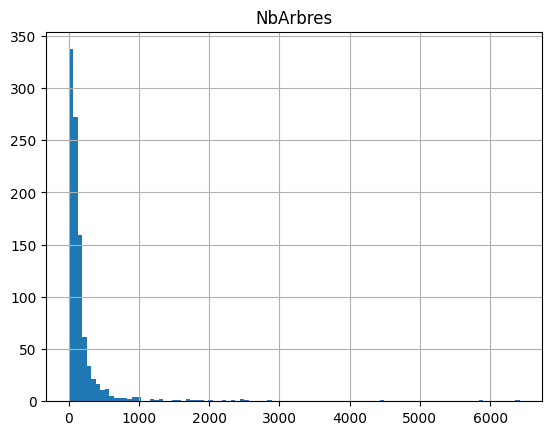

In [ ]:
hist = NbArbres.hist(bins=100)

In [ ]:
#Verification somme

total1 = ArbresParis['domanialite'].size
total2 = NbArbres['NbArbres'].sum()

print(total1)
print(total2)

183094
183094


In [ ]:
# Faire la jointure attributaire

IRISArbres = IRIS.merge(NbArbres, left_on='code_iris', right_on='code_iris_right')
IRISArbres.head()

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 11e Arrondissement   75   
4  Paris 11e Arrondissement   75   

                                            geometry   surface  NbArbres  
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  0.122526        87  
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  0.123771       667  
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  0.079612        12  
3  POLYGON ((654660.400 6862417.100, 654717.000 6...  0.050855        85  
4  POLYGON ((654009.750 6863582.110, 654007.750 6...  0.035169        34

In [ ]:
# Calculer la hauteur moyenne des arbres par IRIS

Hauteurmoyenne = arbresok[["code_iris_right", "hauteurenm"]].groupby("code_iris_right").mean()
Hauteurmoyenne.head()


hauteurenm
code_iris_right            
751010101          8.943089
751010102          9.094595
751010103          7.000000
751010199         10.293976
751010201          7.165605

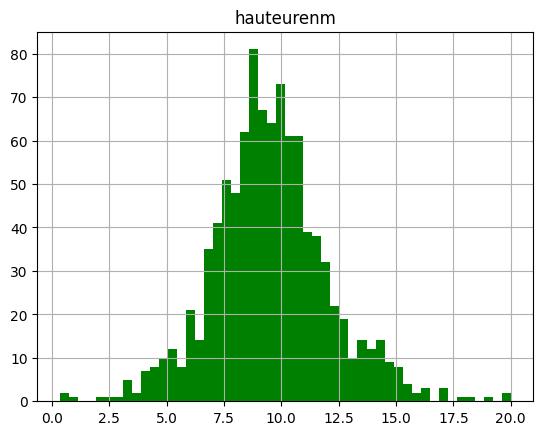

In [ ]:
hist = Hauteurmoyenne.hist(bins=50, color="green")

In [ ]:

# Faire la jointure attributaire

IRISfinal = IRISArbres.merge(Hauteurmoyenne, left_on='code_iris', right_on='code_iris_right')
IRISfinal.head()

nom_iris  insee_com  iris typ_iris  code_iris  \
0      Val de Grace 7      75105  1907        H  751051907   
1      Gros Caillou 7      75107  2807        H  751072807   
2         Madeleine 3      75108  3103        A  751083103   
3         Roquette 18      75111  4318        H  751114318   
4  Folie Mericourt 14      75111  4114        H  751114114   

                    nom_com  dep  \
0   Paris 5e Arrondissement   75   
1   Paris 7e Arrondissement   75   
2   Paris 8e Arrondissement   75   
3  Paris 11e Arrondissement   75   
4  Paris 11e Arrondissement   75   

                                            geometry   surface  NbArbres  \
0  POLYGON ((651827.000 6860330.000, 651871.600 6...  0.122526        87   
1  POLYGON ((648699.720 6861458.710, 648626.610 6...  0.123771       667   
2  POLYGON ((650095.100 6864047.000, 650096.000 6...  0.079612        12   
3  POLYGON ((654660.400 6862417.100, 654717.000 6...  0.050855        85   
4  POLYGON ((654009.750 6863582.110, 654007.750 6...  0.035169        34   

   hauteurenm  
0   12.183908  
1   11.137931  
2   12.583333  
3    8.682353  
4    7.529412

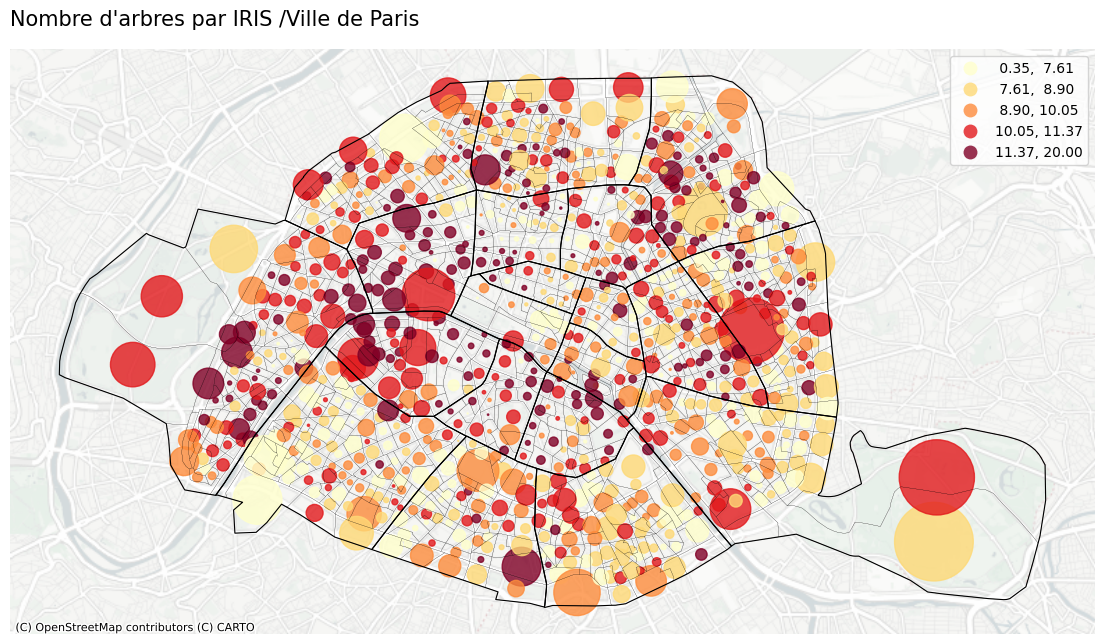

In [ ]:

#Cartographier le nombre d'arbres par IRIS
IRISfinalcentro = IRISfinal.copy()
IRISfinalcentro.geometry = IRISfinalcentro['geometry'].centroid

sizes = IRISfinalcentro['NbArbres'] *0.5  # Ajustez le facteur multiplicatif selon vos besoins


map3, ax = plt.subplots(figsize=(14,14))

ARDT.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.8, color = 'black')
IRIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
IRISfinalcentro.to_crs('EPSG:3857').plot(ax=ax, markersize=sizes, column= "hauteurenm", alpha=0.8, scheme='quantiles',cmap='YlOrRd', legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.PositronNoLabels)

plt.title("Nombre d'arbres par IRIS /Ville de Paris", loc='left', fontsize=15)
ax.axis("off")

plt.show()

#Carroyage et agrégation spatiales

In [ ]:
 #Définir une emprise pour la couche des vélibs

 VelibParis.total_bounds

array([ 644237.93589401, 6857550.11858569,  660405.20414051,
       6866949.75249718])

(643429.572481681, 661213.5675528377, 6857080.1368901115, 6867419.734192758)

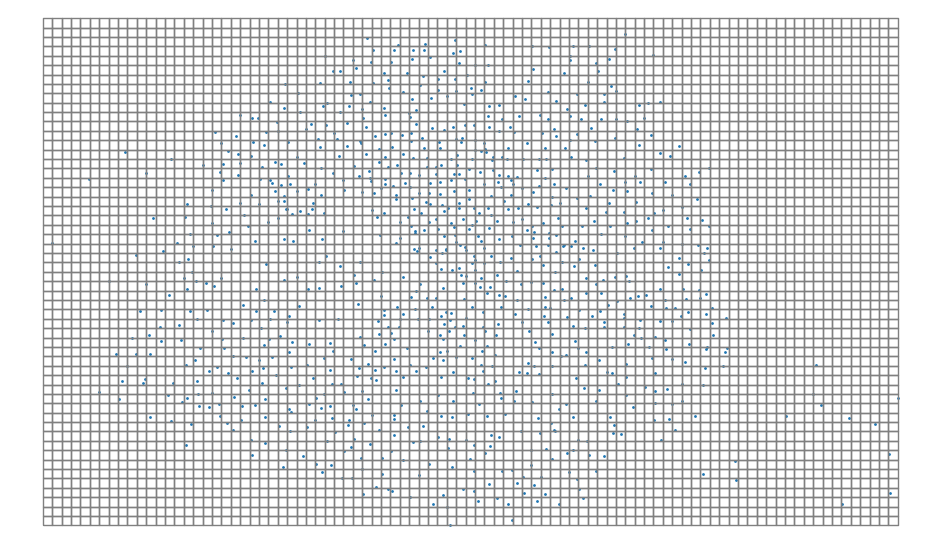

In [ ]:
import shapely.geometry

# Définir l'emprise de la grille
xmin, ymin, xmax, ymax= VelibParis.total_bounds

# Paramètrer le nombre de cellule
n_cells=90
cell_size = (xmax-xmin)/n_cells

# Création des cellules
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs='EPSG:2154')


# Cartographie pour contrôle
ax = VelibParis.plot(markersize=1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [ ]:
#Jointure spatiale Velibs <> Grille

merged = gpd.sjoin(VelibParis, cell, how='left', op='within')
merged.head(3)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Nom   Code  Veloselectriques  Velosmecaniques  \
0  Benjamin Godard - Victor Hugo  16107                 8                5   
2       Jourdan - Stade Charléty  14014                 3                2   
5             Toudouze - Clauzel   9020                 2                0   

   Velosdispo  Soclesdispo  Capacite      latitude      longitude  \
0          13           22        35  6.863127e+06  646867.547600   
2           5           52        60  6.857908e+06  651784.241945   
5           2           19        21  6.864568e+06  651401.378236   

                         geometry    Txdispo  Txoccupation  index_right  
0  POINT (646867.548 6863127.314)  62.857143     37.142857        841.0  
2  POINT (651784.242 6857907.540)  86.666667     13.333333       2323.0  
5  POINT (651401.378 6864567.904)  90.476190      9.523810       2199.0

In [ ]:
# Agrégation statistique
dissolve = merged.dissolve(by="index_right", aggfunc="sum")
dissolve.head(3)


<ipython-input-100-702f1bbfbe97>:2: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  dissolve = merged.dissolve(by="index_right", aggfunc="sum")


geometry  Veloselectriques  \
index_right                                                     
252.0        POINT (644947.381 6864176.843)                 3   
338.0        POINT (645136.273 6860105.453)                 4   
396.0        POINT (645465.009 6860834.579)                 6   

             Velosmecaniques  Velosdispo  Soclesdispo  Capacite      latitude  \
index_right                                                                     
252.0                     45          48           15        66  6.864177e+06   
338.0                     11          15           15        32  6.860105e+06   
396.0                      8          14           46        60  6.860835e+06   

                 longitude    Txdispo  Txoccupation  
index_right                                          
252.0        644947.381376  22.727273     77.272727  
338.0        645136.272978  46.875000     53.125000  
396.0        645465.009310  76.666667     23.333333

In [ ]:
# Enrichissement du carroyage
cell.loc[dissolve.index, 'Velosdispo']=dissolve.Velosdispo.values
del dissolve
cell.head()


geometry  Velosdispo
0  POLYGON ((644058.300 6857550.119, 644058.300 6...         NaN
1  POLYGON ((644058.300 6857729.755, 644058.300 6...         NaN
2  POLYGON ((644058.300 6857909.391, 644058.300 6...         NaN
3  POLYGON ((644058.300 6858089.028, 644058.300 6...         NaN
4  POLYGON ((644058.300 6858268.664, 644058.300 6...         NaN

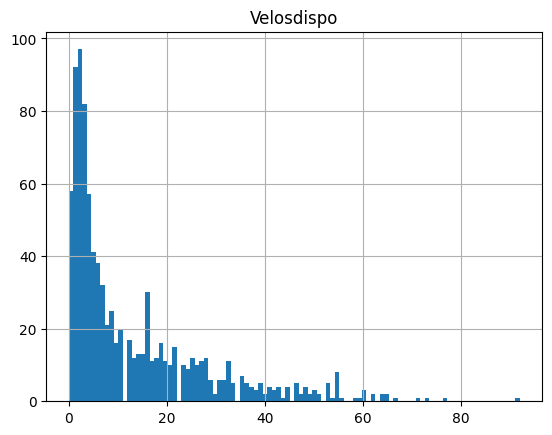

In [ ]:
hist = cell.hist(bins=100)

In [ ]:
#Verification somme

total1 = VelibParis['Velosdispo'].sum()
total2 = cell['Velosdispo'].sum()

print(total1)
print(total2)

12073
12046.0


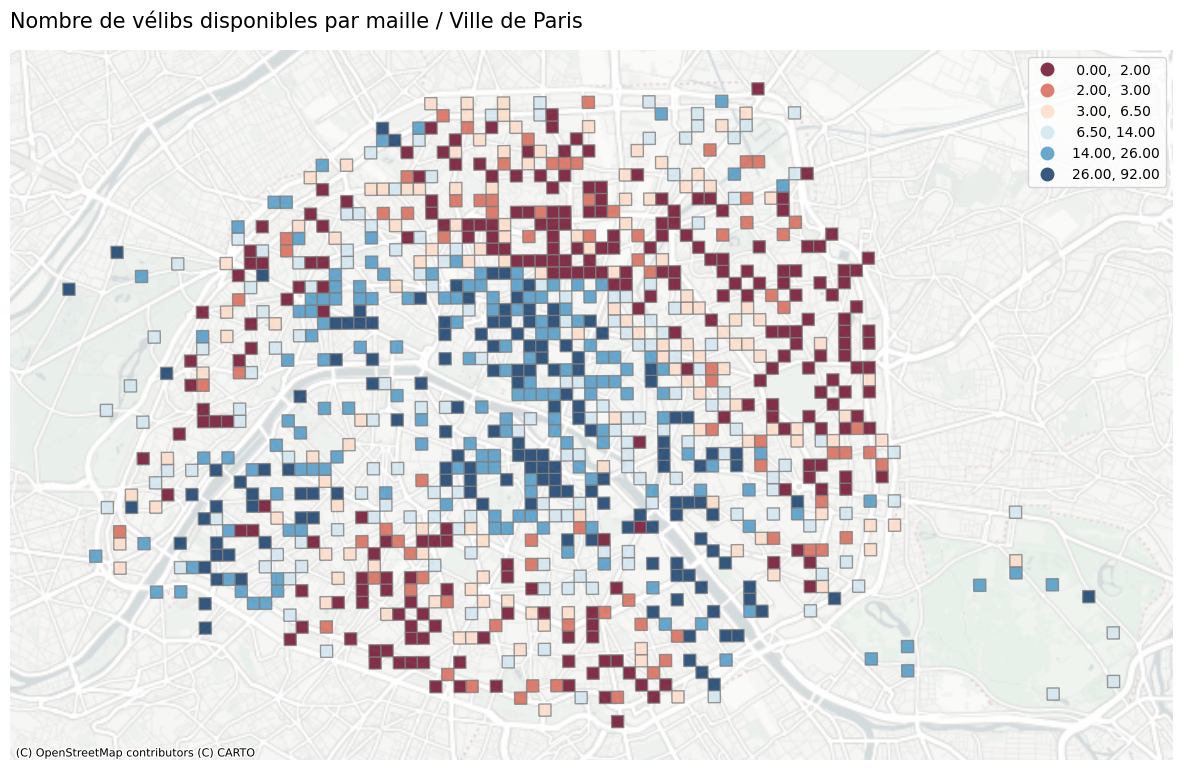

In [ ]:
#Cartographie du carroyage

CarroyageVelib, ax = plt.subplots(figsize=(15,15))

cell.to_crs('EPSG:3857').plot(ax=ax, column='Velosdispo', figsize=(12, 8), k=6, cmap='RdBu', scheme='quantiles', edgecolor="grey", alpha=0.8, legend = True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

ax.axis("off")
plt.title("Nombre de vélibs disponibles par maille / Ville de Paris", loc='left', fontsize=15)

plt.show()


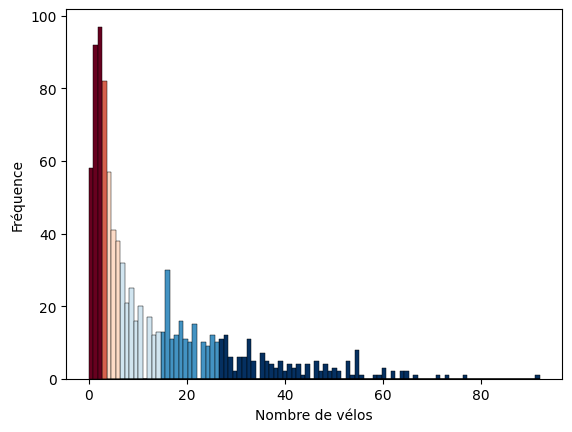

In [ ]:
# Histogramme en fonction de la discrétisation de la carte

import seaborn as sns

# Nombre de quantiles
num_quantiles = 6

# Calculer les quantiles
quantiles = pd.qcut(cell['Velosdispo'], num_quantiles, labels=False)

# Tracer l'histogramme avec des couleurs de quantiles en utilisant Seaborn
sns.histplot(data=cell, x='Velosdispo', bins=100, hue=quantiles, palette='RdBu',  alpha=1, legend=False)

# Définir les étiquettes des axes
plt.xlabel("Nombre de vélos")
plt.ylabel("Fréquence")

# Afficher le graphe
plt.show()

geometry
0     POLYGON ((643034.034 6857497.042, 643034.034 6...
1     POLYGON ((643034.034 6857674.102, 643034.034 6...
2     POLYGON ((643034.034 6857851.161, 643034.034 6...
3     POLYGON ((643034.034 6858028.221, 643034.034 6...
4     POLYGON ((643034.034 6858205.280, 643034.034 6...
...                                                 ...
5605  POLYGON ((660917.036 6866350.013, 660917.036 6...
5606  POLYGON ((660917.036 6866527.073, 660917.036 6...
5607  POLYGON ((660917.036 6866704.132, 660917.036 6...
5608  POLYGON ((660917.036 6866881.192, 660917.036 6...
5609  POLYGON ((660917.036 6867058.251, 660917.036 6...

[5610 rows x 1 columns]

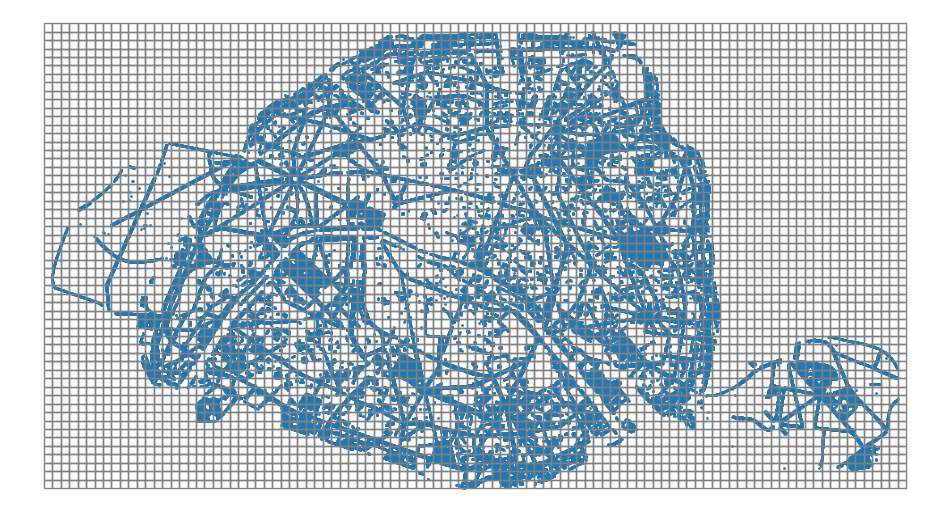

In [ ]:
 #Définir une emprise pour la couche des vélibs
ArbresParis.total_bounds

 # Définir l'emprise de la grille
xmin, ymin, xmax, ymax= ArbresParis.total_bounds

# Paramètrer le nombre de cellule
n_cells=100
cell_size = (xmax-xmin)/n_cells

# Création des cellules
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs='EPSG:2154')

# Cartographie pour contrôle
ax = ArbresParis.plot(markersize=1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")
cell

# Méthode 2 > H3 Uber Index

In [ ]:
# Install H3Index (UBER)
!pip install h3
from h3 import h3

In [ ]:
# Avant d'aller plus loin avec cette méthode il faut REPROJETER le jeu de données en entrée

ArbresParis = ArbresParis.to_crs(4326)

In [ ]:
#Création du maillage

h3_level = 10 #ici un maillage hexagonale de niveau n

def lat_lng_to_h3(row):
    return h3.geo_to_h3(row.geometry.y, row.geometry.x, h3_level)

ArbresParis['h3'] = ArbresParis.apply(lat_lng_to_h3, axis=1)
ArbresParis.head()

idbase domanialite  arrondissement   libellefrancais  hauteurenm  \
0   295429  Alignement  PARIS 5E ARRDT           Platane          17   
1  2038488  Alignement  PARIS 5E ARRDT  Poirier à fleurs           5   
2   124351      Jardin  PARIS 5E ARRDT           Tilleul           8   
3   124349      Jardin  PARIS 5E ARRDT           Tilleul           8   
4   295517  Alignement  PARIS 5E ARRDT           Platane          21   

                            geo_point_2d            Latitude  \
0      48.850740334399,2.346172628644636     48.850740334399   
1  48.849984050336055,2.3464871072884645  48.849984050336055   
2   48.85241592002203,2.3474525940318602   48.85241592002203   
3   48.85234247180192,2.3474730989187775   48.85234247180192   
4    48.850577904366986,2.34616408064251  48.850577904366986   

            Longitude    nom_iris  insee_com  iris typ_iris  code_iris  \
0   2.346172628644636  Sorbonne 4      75105  2004        H  751052004   
1  2.3464871072884645  Sorbonne 4      75105  2004        H  751052004   
2  2.3474525940318602  Sorbonne 4      75105  2004        H  751052004   
3  2.3474730989187775  Sorbonne 4      75105  2004        H  751052004   
4    2.34616408064251  Sorbonne 4      75105  2004        H  751052004   

                   nom_com  dep   surface                  geometry  \
0  Paris 5e Arrondissement   75  0.096651  POINT (2.34617 48.85074)   
1  Paris 5e Arrondissement   75  0.096651  POINT (2.34649 48.84998)   
2  Paris 5e Arrondissement   75  0.096651  POINT (2.34745 48.85242)   
3  Paris 5e Arrondissement   75  0.096651  POINT (2.34747 48.85234)   
4  Paris 5e Arrondissement   75  0.096651  POINT (2.34616 48.85058)   

                h3  
0  8a1fb467195ffff  
1  8a1fb467195ffff  
2  8a1fb46624b7fff  
3  8a1fb46624b7fff  
4  8a1fb467195ffff

In [ ]:
#Dénombrement des arbres par maille

counts = ArbresParis.groupby(['h3']).h3.agg('count').to_frame('count').reset_index()
counts.head()

h3  count
0  8a1fb460d827fff     62
1  8a1fb460d82ffff      7
2  8a1fb460d837fff      2
3  8a1fb460d907fff     99
4  8a1fb460d90ffff    120

h3  count                                           geometry
0  8a1fb460d827fff     62  POLYGON ((2.27124 48.82880, 2.27034 48.82864, ...
1  8a1fb460d82ffff      7  POLYGON ((2.27286 48.82848, 2.27196 48.82832, ...
2  8a1fb460d837fff      2  POLYGON ((2.27015 48.82799, 2.26925 48.82783, ...
3  8a1fb460d907fff     99  POLYGON ((2.26910 48.83024, 2.26820 48.83007, ...
4  8a1fb460d90ffff    120  POLYGON ((2.27072 48.82992, 2.26982 48.82976, ...

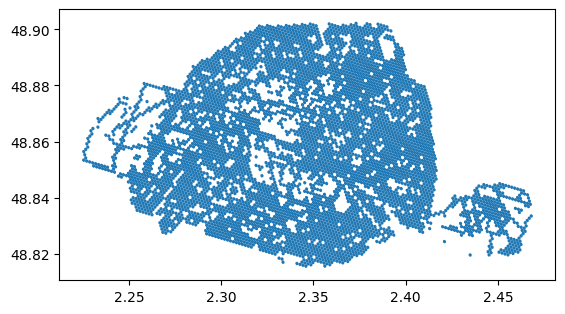

In [ ]:
# Création de la géométrie du maillage

def add_geometry(row):
    points = h3.h3_to_geo_boundary(
      row['h3'], True)
    return Polygon(points)

counts['geometry'] = counts.apply(add_geometry, axis=1)
Mailage = gpd.GeoDataFrame(counts, crs='EPSG:4326')
Mailage.plot()
Mailage.head()


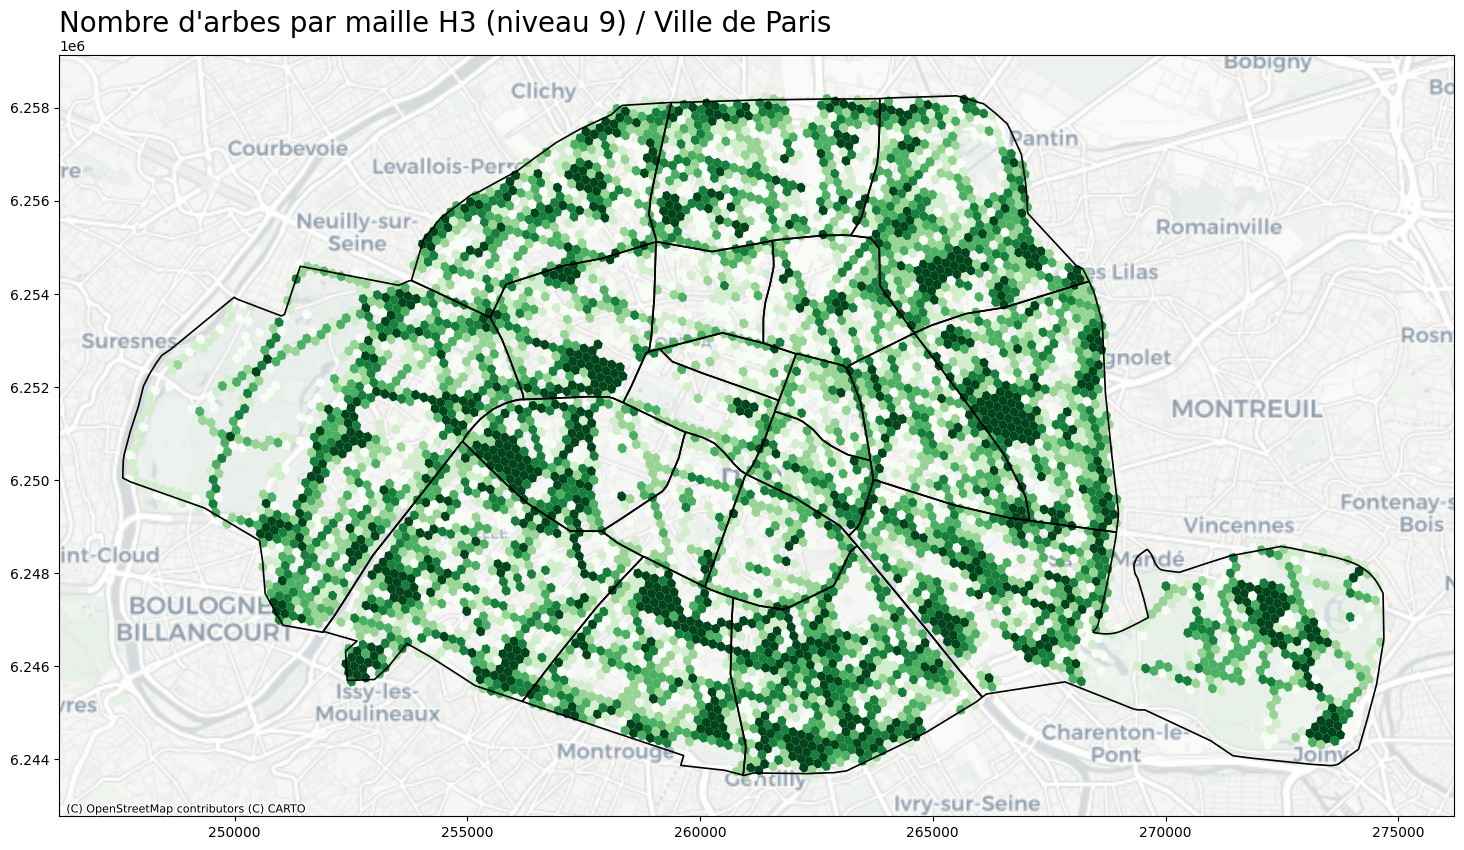

In [ ]:
# Cartographie

H3Map, ax = plt.subplots(figsize=(18,16))

Mailage.to_crs('EPSG:3857').plot(ax=ax, column='count', figsize=(15, 10),k=6, cmap='Greens', scheme='quantiles')
ARDT.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=1.2, color = 'black')
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)

plt.title("Nombre d'arbes par maille H3 (niveau 9) / Ville de Paris", loc='left', fontsize=20)
plt.show()